In [3]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("./R1/patients_edges.csv", index_col=0)
df.reset_index(inplace=True)
df = df[df['source'] != df['target']] #remove autoconnections
df_cls =  pd.read_csv("./R1/patients_classes.csv", index_col=0)
#g = nx.read_edgelist("./R1/patients_edges.csv", delimiter=',')

In [33]:
g = ig.Graph.DataFrame(df, directed=False)

In [37]:
layout = g.layout(layout='auto')

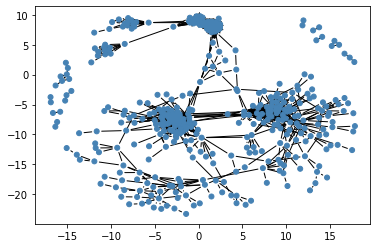

In [38]:
fig, ax = plt.subplots()
ig.plot(g, target=ax, layout=layout)

In [50]:
colors = []
for patient in g.vs["name"]:
    
    cls = df_cls.loc[patient, :]['class']
    
    if cls == "stage1":
        colors.append("green")
    elif cls ==  "stage2":
        colors.append("blue")
    elif cls ==  "stage3":
        colors.append("magenta")
    elif cls ==  "stage4":
        colors.append("red")
    elif cls ==  "control":
        colors.append("yellow")

g.vs["color"] = colors

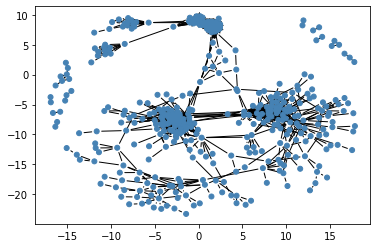

In [51]:
fig, ax = plt.subplots()
ig.plot(g, target=ax, layout=layout)

In [56]:
out = ig.plot(g, layout = layout, bbox = (700, 700), margin = 10, vertex_size=10)

In [57]:
out.save("./R1/graph_plot.png")

In [60]:
def plot_graph(net, remove_autoconnections=True):
    
    df = pd.read_csv(net+"/patients_edges.csv", index_col=0)
    df.reset_index(inplace=True)
    if remove_autoconnections:
        df = df[df['source'] != df['target']] 
    df_cls =  pd.read_csv("./R1/patients_classes.csv", index_col=0)
    
    g = ig.Graph.DataFrame(df, directed=False)
    
    
    colors = []
    for patient in g.vs["name"]:

        cls = df_cls.loc[patient, :]['class']

        if cls == "stage1":
            colors.append("green")
        elif cls ==  "stage2":
            colors.append("blue")
        elif cls ==  "stage3":
            colors.append("magenta")
        elif cls ==  "stage4":
            colors.append("red")
        elif cls ==  "control":
            colors.append("yellow")

    g.vs["color"] = colors
    layout = g.layout(layout='auto')
    out = ig.plot(g, layout = layout, bbox = (700, 700), margin = 10, vertex_size=10)
    if remove_autoconnections:
        out.save(net+"/graph_plot.png")
    else:
        out.save(net+"/graph_plot_autoconnections.png")

In [61]:
plot_graph("R1")
plot_graph("R2")
plot_graph("R3")
plot_graph("R4")
plot_graph("R5")

In [62]:
plot_graph("R1", False)
plot_graph("R2", False)
plot_graph("R3", False)
plot_graph("R4", False)
plot_graph("R5", False)